In [1]:
# En esta práctica vamos a clasificar un DataSet mediante un arbol de decisiones:
# Algoritmo que nosotros entrenamos y que hace una serie de preguntas.
# 
# Ponemos el ejemplo de una representación de los datos en una gráfica
# o nube de puntos rojos y verdes.
# Imaginemos que la nube de puntos se puede separar perfectamente en
# cuatro partes iguales, de las cuales tres de ellas están llenas en su 
# totalidad de puntos rojos (1º, 2º, 3º cuadrante) y una de puntos verdes (4 cuadrante).


In [ ]:
# Importo la función del árbol de decisiones "DecisionTreeClassifier".
# Importo dos sets de datos: "Cancer" y "Iris".
# Importo train_test_split como siempre para dividir entre Testing y Training.
# Importo matplotlib y numpy para poder graficar el árbol de decisones que tenemos.

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# Como vanimos haciendo ateriormente, paso todo el set de datos a nuestra variable "iris":

In [39]:
iris=load_iris()

In [40]:
# Vamos a crear 4 variables que van a ser:
# --> Target  = etiquetas o características.

In [41]:
X_entrenamiento,X_test,y_entrenamiento,y_test=train_test_split(iris.data,iris.target)

In [42]:
# A nuestra variable "arbol" le paso todo nuestro árbol de decisiones:

In [43]:
arbol=DecisionTreeClassifier()

In [44]:
# Ya que tenemos esto hecho podemos empezar a ENTRENAR A NUESTRO ALGORTIRMO:

In [45]:
# Importamos los datos que tenemos de entrenamiento tanto de X como de Y.

In [46]:
arbol.fit(X_entrenamiento,y_entrenamiento)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
# Ahora vamos a comprobar si ha aprendido bien nuestro algortimo:

In [48]:
arbol.score(X_test,y_test)

0.9210526315789473

In [49]:
# Vemos que ha obtenido la respuesta correcta el 92% de las veces.
# Ahora vamos a comprobar si ha aprendido bien nuestro algortimo pero con los
# datos de entrenamiento en vez de con los del test:

In [50]:
arbol.score(X_entrenamiento,y_entrenamiento)

1.0

In [51]:
# Obtenemos un 100% de acierto, pero esto no es siempre bueno ya que obtenemos
# el ya conocido OVERFITTING o Sobreajuste.

In [52]:
# Ahora vamos a formar un archivo .dot con los datos obtenidos (arbol) y lo 
# graficaremos.

In [53]:
export_graphviz(arbol,out_file='arbol.dot',class_names=iris.target_names,
               feature_names=iris.feature_names,impurity=False,filled=True)

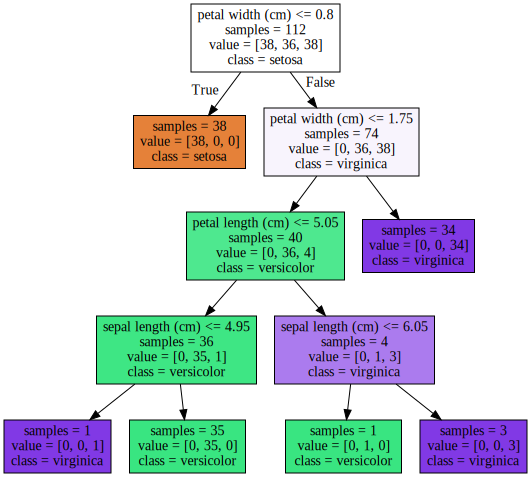

In [54]:
with open('arbol.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [55]:
# Podemos traducir el anterior esquema en lo siguiente:

# Si la longitud de nuestro pétalo es menor o igual a 2.6cm, pertenece a la clase 'setosa'.
# Si es falso se generan otra serie de preguntas.

# Con el modelo de árbol tenemos otra característica que se llama 'feature_importances',
# que básicamente nos dice que tan importante es una característica en especifico
# para ayudarnos a definir la clase a la que pertenece.
# Por ejemplo: Si tubieramos "temperatura" en nuestra clasificación no afectaría en mucho.

In [56]:
# Vamos a clasificarlos:

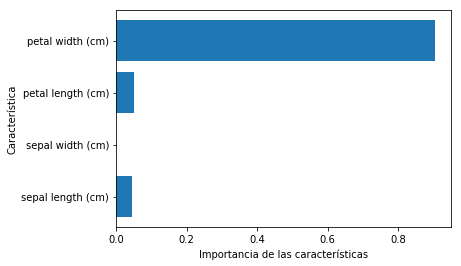

In [58]:
caract=iris.data.shape[1]
plt.barh(range(caract),arbol.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Característica')
plt.show()

In [59]:
# Lo anterior quiere decir que la característica más importante es la longitud
# de los pétalos y que por lo tanto, con ellos únicamente podemos tener un gran
# porcentaje de éxito a la hora de clasificar los datos.

In [62]:
# Y como lo habíamos comentado antes, sobreajustar no siempre es bueno, por lo
# que vamos a mover un poco los parámetros:
# Vamos a cambiar por ejemplo la profundidad (el máximo nivel de datos con los
# que vamos a trabajar. En este anteriormente teníamos 6 niveles en el gráfico)

# Ejecutamos y entrenamos:

In [63]:
arbol=DecisionTreeClassifier(max_depth=5)  #NIVELES DEL GRAFO

In [65]:
arbol.fit(X_entrenamiento,y_entrenamiento)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
arbol.score(X_test,y_test)

0.9210526315789473

In [67]:
# Obtenemos un 92% con los parámetros de TEST.

In [70]:
arbol.score(X_entrenamiento,y_entrenamiento)

1.0

In [68]:
# Obtenemos un 100% con los parámetros de ENTRENAMIENTO. (OVERFITTING)

In [72]:
# Para poder graficar como clasificó los datos nuestro algoritmo...

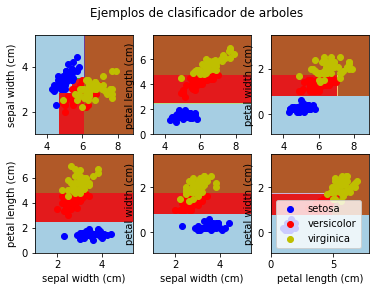

In [75]:
n_classes=3
plot_colors='bry'
plot_step=0.02

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                               [1,2],[1,3],[2,3]]):
    X=iris.data[:,pair]
    y=iris.target
    
    #entrena algoritmo
    clf=DecisionTreeClassifier(max_depth=3).fit(X,y)
    plt.subplot(2,3,pairidx + 1)
    
    x_min, x_max=X[:,0].min() - 1, X[:,0].max() +1
    y_min, y_max=X[:,1].min() - 1, X[:,1].max() +1
    xx, yy=np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z=Z.reshape(xx.shape)
    cs=plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis('tight')

    #plot puntos de entrenamiento
    for i, color in zip(range(n_classes), plot_colors):
        idx=np.where(y == i)
        plt.scatter(X[idx, 0], X[idx,1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)
    plt.axis('tight')

plt.suptitle('Ejemplos de clasificador de arboles')

plt.legend()
plt.show()

In [ ]:
# Cuando caiga el dato dentro de la grafica no va a tener overfitting ya que no hay pequeñas lineas rojas por ejemplo.